# Worksheet 24

Name:  Emily Opresnick
UID: U91979014

### Topics

- Tuning Neural Networks

## Tuning Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import tensorflow
from tensorflow import keras
from tensorflow import math, random, stack

# from tensorflow.keras import layers
# from tensorflow.keras import initializers
# from tensorflow.keras.activations import relu


c:\Users\opres\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


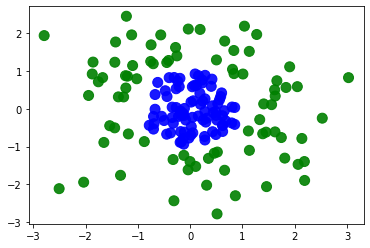

Epoch 1/500
4/4 [==============================] - 2s 10ms/step - loss: 0.7732
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 0.7679
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 0.7650
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 0.7621
Epoch 5/500
4/4 [==============================] - 0s 8ms/step - loss: 0.7596
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 0.7571
Epoch 7/500
4/4 [==============================] - 0s 8ms/step - loss: 0.7547
Epoch 8/500
4/4 [==============================] - 0s 7ms/step - loss: 0.7522
Epoch 9/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7499
Epoch 10/500
4/4 [==============================] - 0s 6ms/step - loss: 0.7474
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7450
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 0.7432
Epoch 13/500
4/4 [==============================] - 0s 3ms/

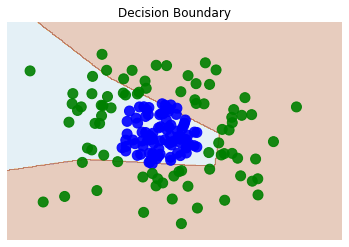

In [8]:
# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# The model - modify this
model = keras.models.Sequential()
model.add(keras.layers.Dense(3, input_dim=2, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y


X, Y = generate_circle_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=500)

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()